In [195]:
import numpy as np


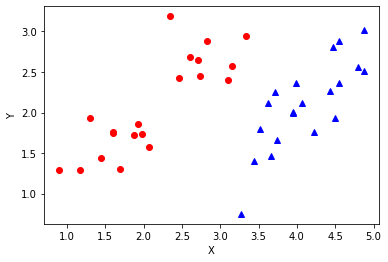

In [196]:
# step 1: sinh data
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# vẽ các điểm trên toạ độ 
import matplotlib.pyplot as plt
plt.plot(X[0][:N],X[1][:N],'ro')
plt.plot(X[0][N:],X[1][N:],'b^')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [197]:
# thêm X0=1 vào vector input X 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
X = X.T
y = y.T
print(X[:3])
print(y[:3])

[[1.         2.4601587  2.42459064]
 [1.         1.86929417 1.71837659]
 [1.         2.35027854 3.18800855]]
[[1.]
 [1.]
 [1.]]


In [198]:
print(X.shape)
print(y.shape)

(40, 3)
(40, 1)


In [199]:
w = np.array([1]*X.shape[1]) # khởi tạo w = 1
print(w)

[1 1 1]


In [200]:
# step 2: xây dựng các hàm f, loss, derivative 
# hàm y = f(x)   
# w: tham số của model 
# x: một điểm ví dụ 
def f(w,x):
    return np.dot(w.T,x)
# test
print(f(w,X[1]))

# hàm tính tất cả các điểm
# X là ma trận chứa tất cả các điểm 
def f(w,X):
    a=np.dot(X,w.T)
    return np.array([a]).T
print(f(w,X))

4.587670762683421
[[5.88474934]
 [4.58767076]
 [6.53828709]
 [3.99648045]
 [6.50214251]
 [6.18225641]
 [7.285742  ]
 [4.71203271]
 [6.71749094]
 [6.36173989]
 [3.19278659]
 [4.24211053]
 [4.78636388]
 [4.35179812]
 [3.87239095]
 [6.28303746]
 [6.73043426]
 [4.35860872]
 [3.46904008]
 [4.65269459]
 [6.13266933]
 [6.73986495]
 [7.43175788]
 [7.92059678]
 [6.94441991]
 [7.69041438]
 [6.98554486]
 [7.17838107]
 [6.39909278]
 [8.38292257]
 [8.35719876]
 [5.83566253]
 [8.42850586]
 [6.96314709]
 [5.01516797]
 [7.35786634]
 [6.96830779]
 [8.88688259]
 [6.32511766]
 [8.27730043]]


In [201]:
# test cho hàm loss 
y1 = f(X,w)
t = np.dot(y1.T,y)
print(y1.T.shape)
print(y.shape)
print(t)

(1, 40)
(40, 1)
[[-39.51296423]]


In [202]:
# hàm loss
def loss():
    y1 = f(X,w)
    t = np.dot(y1.T,y)
    return -t[0][0]
# test
print(loss())

39.51296422514734


In [203]:
# test hàm derivative 
print(y.shape)
print(X.shape)
d1 = np.dot(y.T,X)
print(d1.shape)
print(d1)

(40, 1)
(40, 3)
(1, 3)
[[  0.         -39.34909269  -0.16387153]]


In [204]:
# hàm derivative 
def derivative():
    d1 = np.dot(y.T,X)
    return -d1[0]
d = derivative()
print(d)

[-0.         39.34909269  0.16387153]


In [206]:
x0 = np.linspace(start=1, stop=10, num=50)
y0 = w[0]+w[1]*x0
print(x0)

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]


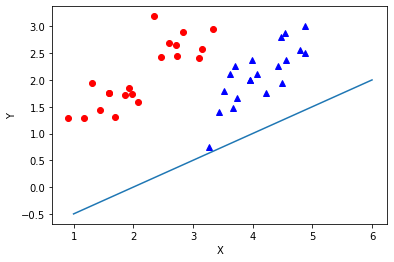

In [207]:
# vẽ đường w1x1 + w2x2 + w0x0 = 0
w = [2,-1,2]
X1 = X.T[1:]
#print(X1)
plt.plot(X1[0][:N],X1[1][:N],'ro')
plt.plot(X1[0][N:],X1[1][N:],'b^')
plt.xlabel('X')
plt.ylabel('Y')

x1 = np.linspace(start=1, stop=6, num=50)
x2 =  (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2)

plt.show()

In [208]:
# step 3: training 
#w = np.array([1]*X.shape[1]) # khởi tạo w = 1
#w = [2,-1,2]
w = np.zeros(X.shape[1])
learning_rate = 0.001
epoch = 10
old_loss = 0
for i in range(epoch):
   
    old_loss = loss()
    print(old_loss,end = ': ')
    d = derivative()
    w = w - learning_rate*d
    new_loss=loss()
    print(new_loss)
   # if abs(old_loss-new_loss)<1 or new_loss<0:
        #break
   
    print('w = ',w)
    

-0.0: -1.5483779496505023
w =  [ 0.         -0.03934909 -0.00016387]
-1.5483779496505023: -3.0967558993010047
w =  [ 0.         -0.07869819 -0.00032774]
-3.0967558993010047: -4.645133848951508
w =  [ 0.         -0.11804728 -0.00049161]
-4.645133848951508: -6.193511798602009
w =  [ 0.         -0.15739637 -0.00065549]
-6.193511798602009: -7.741889748252511
w =  [ 0.         -0.19674546 -0.00081936]
-7.741889748252511: -9.290267697903015
w =  [ 0.         -0.23609456 -0.00098323]
-9.290267697903015: -10.838645647553518
w =  [ 0.         -0.27544365 -0.0011471 ]
-10.838645647553518: -12.387023597204019
w =  [ 0.         -0.31479274 -0.00131097]
-12.387023597204019: -13.93540154685452
w =  [ 0.         -0.35414183 -0.00147484]
-13.93540154685452: -15.483779496505022
w =  [ 0.         -0.39349093 -0.00163872]


In [ ]:
# step 4: testing 